In [1]:
import numpy as np
import pandas as pd
from labwork import *

In [2]:
D = np.array([
    [25.2, 4.24, 10.12],  # T (C), P1, P2 (мм)
    [26.2, 4.12, 10.21],
    [27.1, 4.01, 10.35],
    [28.0, 3.86, 10.55],
    [29.0, 3.65, 10.76],
    [30.0, 3.47, 10.95],
    [31.0, 3.20, 11.19],
    [32.0, 3.01, 11.38],
    [33.0, 2.77, 11.62],
    [33.9 ,2.55, 11.89]
], dtype=float)

condens = np.array([3.21 - 3.04] * 7 + [3.19 - 3.0, 2.95 - 2.79 + 0.03, 2.74 - 2.55])
data_frame = pd.DataFrame()

In [3]:
data_frame["T_C"] = D[:, 0]
data_frame["T_K"] = D[:, 0] + 273.15
data_frame["P1_mm"] = D[:, 1] + condens *  0.7893 / 13.546 
data_frame["P2_mm"] = D[:, 2] 

data_frame["sum_P_mm"] = data_frame["P2_mm"].values + data_frame["P1_mm"].values
data_frame["delta_P_mm"] = data_frame["P2_mm"].values - data_frame["P1_mm"].values
data_frame["delta_P_pa"] = data_frame["delta_P_mm"].values * 133.3  
data_frame["ln_delta_P_pa"] = np.log(data_frame["delta_P_pa"].values)  
data_frame["condens, mm"] = condens
data_frame

,T_C,T_K,P1_mm,P2_mm,sum_P_mm,delta_P_mm,delta_P_pa,ln_delta_P_pa,"condens, mm"
0,25.2,298.35,4.249906,10.12,14.369906,5.870094,782.483586,6.662473,0.17
1,26.2,299.35,4.129906,10.21,14.339906,6.080094,810.476586,6.697622,0.17
2,27.1,300.25,4.019906,10.35,14.369906,6.330094,843.801586,6.737917,0.17
3,28.0,301.15,3.869906,10.55,14.419906,6.680094,890.456586,6.791734,0.17
4,29.0,302.15,3.659906,10.76,14.419906,7.100094,946.442586,6.852710,0.17
5,30.0,303.15,3.479906,10.95,14.429906,7.470094,995.763586,6.903510,0.17
6,31.0,304.15,3.209906,11.19,14.399906,7.980094,1063.746586,6.969552,0.17
7,32.0,305.15,3.021071,11.38,14.401071,8.358929,1114.245243,7.015933,0.19
8,33.0,306.15,2.781071,11.62,14.401071,8.838929,1178.229243,7.071768,0.19
9,33.9,307.05,2.561071,11.89,14.451071,9.328929,1243.546243,7.125722,0.19


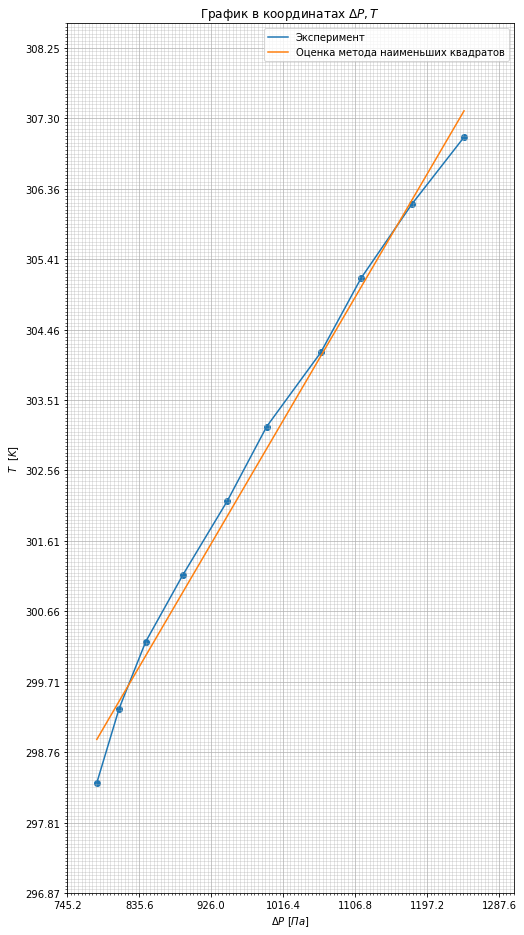

In [4]:

a, b, sigma_a, sigma_b = eval_mnk(data_frame["delta_P_pa"].values, data_frame["T_K"].values)

plt_lab_figure(data_frame["delta_P_pa"].values.max(),
               data_frame["T_K"].values.max(),
               data_frame["delta_P_pa"].values.min(),
               data_frame["T_K"].values.min(),
               1.05, 1.005)

plt.plot(data_frame["delta_P_pa"].values, data_frame["T_K"].values, label="Эксперимент")
plt.scatter(data_frame["delta_P_pa"].values, data_frame["T_K"].values)
grid = np.array([(data_frame["delta_P_pa"].values).min(), (data_frame["delta_P_pa"].values).max()]) 
plt.plot(grid, grid * b + a, label="Оценка метода наименьших квадратов")
plt.xlabel(r"$\Delta P$ [$Па$]")
plt.ylabel(r"$T$  [$K$]")

plt.title(r"График в координатах $\Delta P, T$")
plt.legend()
plt.show()


In [5]:
L1 = 8.31 * (data_frame["T_K"].mean()**2) * (1./b) / (data_frame["delta_P_pa"].mean()) 
L1_R = prodErrorR_degs([(2, data_frame["T_K"].std(ddof=1) / data_frame["T_K"].mean()
                            / sqrt(len(data_frame["T_K"]))),
                       (1, data_frame["delta_P_pa"].std(ddof=1) / data_frame["delta_P_pa"].mean()
                            / sqrt(len(data_frame["T_K"]))),
                       (-1, sigma_b)])
sciPrintR(L1, L1_R, "L1 = ")

print("Расхождение = ", abs(42320 - L1) / 42320)

L1 =  41998.7218248 +- 2162.22046145 ( 5.14830063274 %)
Расхождение =  0.00759163930056


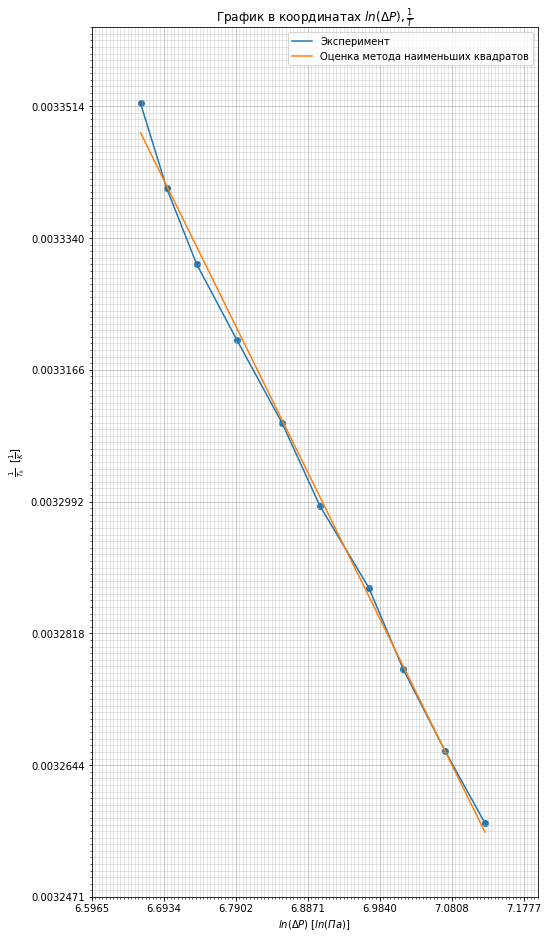

In [6]:

a, b, sigma_a, sigma_b = eval_mnk(data_frame["ln_delta_P_pa"].values, 1./ data_frame["T_K"].values)

plt_lab_figure(data_frame["ln_delta_P_pa"].values.max(),
               (1./ data_frame["T_K"].values).max(),
               data_frame["ln_delta_P_pa"].values.min(),
               (1./ data_frame["T_K"].values).min(),
               1.01, 1.003)

plt.plot(data_frame["ln_delta_P_pa"].values, 1./ data_frame["T_K"].values, label="Эксперимент")
plt.scatter(data_frame["ln_delta_P_pa"].values, 1./ data_frame["T_K"].values)
grid = np.array([(data_frame["ln_delta_P_pa"].values).min(), (data_frame["ln_delta_P_pa"].values).max()]) 
plt.plot(grid, grid * b + a, label="Оценка метода наименьших квадратов")
plt.xlabel(r"$ln(\Delta P)$ [$ln(Па)$]")
plt.ylabel(r"$\frac{1}{T_k}$  [$\frac{1}{K}$]")
plt.title(r"График в координатах $ln(\Delta P), \frac{1}{T}$")
plt.legend()
plt.show()


In [7]:
1./b, 1./a

(-5020.1478231778256, 213.90166841496205)

In [8]:
L2 = - 8.31 * 1./b
L2_R = sigma_b / b
sciPrintR(L2, L2_R, "L2 = ")

print("Расхождение = ", abs(42320 - L2) / 42320)

L2 =  41717.4284106 +- -714.84370829 ( -1.71353732846 %)
Расхождение =  0.0142384591066


In [9]:
L3 = 42350

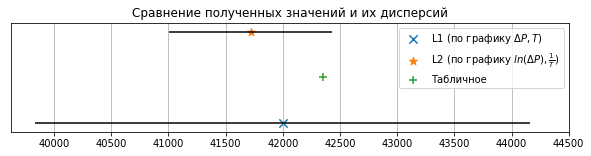

In [10]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)

plt.hlines(0, L1 - L1_R * L1, L1 + L1_R * L1)
plt.scatter(L1, 0, label=r"L1 (по графику $\Delta P, T$)", marker="x", s=70)
plt.hlines(1, L2 - L2_R * L2, L2 + L2_R * L2)
plt.scatter(L2, 1, label=r"L2 (по графику $ln(\Delta P), \frac{1}{T}$)", marker="*", s=70)
plt.scatter(L3, 0.5, label="Табличное", marker="+", s=70)
plt.ylim((-0.1, 1.1))
ax.set_yticks([])
ax.set_xticks(np.arange(40000, 45000, 500))
plt.legend()
plt.grid()
plt.title("Сравнение полученных значений и их дисперсий")
plt.show()

In [11]:
printable_df = pd.DataFrame()
printable_df["T [$C^o$]"] = D[:, 0]
printable_df["T [K]"] = D[:, 0] + 273.15
printable_df["$P_1 [мм]$"] = D[:, 1]  # + condens *  0.7893 / 13.546 
printable_df["$P_2 [мм]$"] = D[:, 2] 

printable_df["$P_1 + P_2$"] = data_frame["P2_mm"].values + data_frame["P1_mm"].values
printable_df["$\Delta P [мм]$"] = data_frame["P2_mm"].values - data_frame["P1_mm"].values
printable_df["$\Delta P [Па]$"] = data_frame["delta_P_mm"].values * 133.3  
printable_df["$ln(\Delta P)$"] = np.log(data_frame["delta_P_pa"].values)  
printable_df["Конд. [мм]"] = condens

printable_df.round(6)

,T [$C^o$],T [K],$P_1 [мм]$,$P_2 [мм]$,$P_1 + P_2$,$\Delta P [мм]$,$\Delta P [Па]$,$ln(\Delta P)$,Конд. [мм]
0,25.2,298.35,4.24,10.12,14.369906,5.870094,782.483586,6.662473,0.17
1,26.2,299.35,4.12,10.21,14.339906,6.080094,810.476586,6.697622,0.17
2,27.1,300.25,4.01,10.35,14.369906,6.330094,843.801586,6.737917,0.17
3,28.0,301.15,3.86,10.55,14.419906,6.680094,890.456586,6.791734,0.17
4,29.0,302.15,3.65,10.76,14.419906,7.100094,946.442586,6.852710,0.17
5,30.0,303.15,3.47,10.95,14.429906,7.470094,995.763586,6.903510,0.17
6,31.0,304.15,3.20,11.19,14.399906,7.980094,1063.746586,6.969552,0.17
7,32.0,305.15,3.01,11.38,14.401071,8.358929,1114.245243,7.015933,0.19
8,33.0,306.15,2.77,11.62,14.401071,8.838929,1178.229243,7.071768,0.19
9,33.9,307.05,2.55,11.89,14.451071,9.328929,1243.546243,7.125722,0.19
